In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv('Car details v3.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
name             8128 non-null object
year             8128 non-null int64
selling_price    8128 non-null int64
km_driven        8128 non-null int64
fuel             8128 non-null object
seller_type      8128 non-null object
transmission     8128 non-null object
owner            8128 non-null object
mileage          7907 non-null object
engine           7907 non-null object
max_power        7913 non-null object
torque           7906 non-null object
seats            7907 non-null float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [15]:
# Step1
def fuel_type(x):
    if x == 'Diesel':
        return 4
    elif x == 'Petrol':
        return 3
    elif x == 'LPG':
        return 1
    else:
        return 2
df['fuel'] = df['fuel'].apply(fuel_type)    

In [17]:
# Step2
def dealer_value(y):
    if y == 'Dealer':
        return 3
    elif y == 'Trustmark Dealer':
        return 2
    else:
        return 1
df['seller_type'] = df['seller_type'].apply(dealer_value)    

In [22]:
# Step3
df.dropna(axis=0,inplace=True)

In [33]:
# Step4
def transmission_update(x):
    if x == "Automatic":
        return 1
    else:
        return 0
df['transmission'] = df['transmission'].apply(transmission_update)

In [54]:
# Step5
def owner(x):
    if x == 'Test Drive Car':
        return 5
    elif x == 'First Owner':
        return 4
    elif x == 'Second Owner':
        return 3
    elif x == 'Third Owner':
        return 2
    else:
        return 1
        
df['owner'] = df['owner'].apply(owner)

In [66]:
# Step 6
df['mileage'] = df['mileage'].apply(lambda x: x.split()[0])
df['mileage'] = df['mileage'].apply(float)

In [88]:
df.corr()['selling_price'].sort_values(ascending=False)

selling_price    1.000000
max_power        0.749674
transmission     0.590269
engine           0.455682
year             0.412302
seller_type      0.404730
owner            0.238622
fuel             0.203686
seats            0.041617
mileage         -0.126280
km_driven       -0.222158
Name: selling_price, dtype: float64

In [83]:
# Step 6
df['engine'] = df['engine'].apply(lambda x: int(x.split()[0]))

In [87]:
# step 7
df['max_power'] = df['max_power'].apply(lambda x : float(x.split()[0]))

In [90]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'Brand_name'],
      dtype='object')

In [115]:
X = df.drop(['name','Brand_name','torque','selling_price'], axis = 1)
y = df['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [126]:
RFC = RandomForestClassifier(random_state=123,n_estimators=100)
RFC.fit(X_train,y_train)
RFC.score(X_test, y_test)

0.2318718381112985

In [127]:
prediction = RFC.predict(X_test)
y_test

3942     60000
1946    444000
2999    160000
4268    450000
5508    550000
         ...  
2075    350000
1548    670000
2465    114999
630     420000
904     800000
Name: selling_price, Length: 2372, dtype: int64

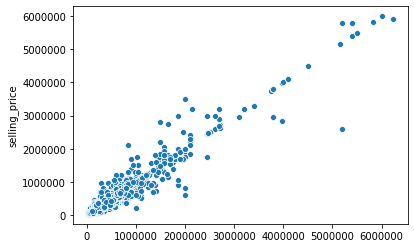

In [128]:
sns.scatterplot(x = prediction, y = y_test)

In [129]:
metrics.r2_score(y_test,prediction)

0.9621817085719188

In [130]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 75476.9586846543
MSE: 23504402326.586002
RMSE: 153311.45530124617


In [121]:
dn = pd.DataFrame(prediction)

In [122]:
dn['test']= y_test.values

In [123]:
dn

,0,test
0,45000,60000
1,325000,444000
2,150000,160000
3,450000,450000
4,495000,550000
...,...,...
2367,300000,350000
2368,680000,670000
2369,60000,114999
2370,500000,420000
